In [14]:
from actionable_contr_reps import ActionableRep
import torch
from torch import Tensor
import matplotlib.pyplot as plt

In [13]:
phi = ActionableRep(2)
phi.load_state_dict(torch.load("arc.pt"))
phi.eval()

ActionableRep(
  (l1): Linear(in_features=2, out_features=16, bias=True)
  (l2): Linear(in_features=16, out_features=16, bias=True)
  (l3): Linear(in_features=16, out_features=2, bias=True)
)

<IPython.core.display.Javascript object>


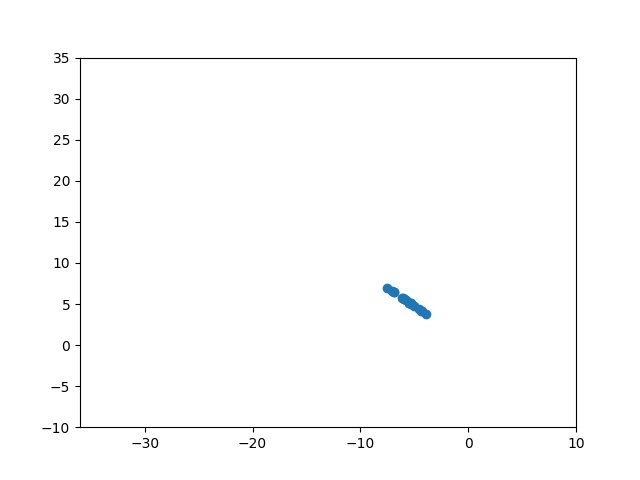

interactive(children=(FloatSlider(value=0.0, description='x1', max=1.0, min=-1.0, step=0.01), FloatSlider(valu…

In [35]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
num_pts = 20
line = ax.scatter([1]*num_pts, [1]*num_pts)
plt.xlim((-36, 10)); plt.ylim((-10, 35))


def update(x1 = (-1.0, 1.0, 0.01), x2 = (-1.0, 1.0, 0.01)):
    noisy_x = torch.randn(num_pts, 2)*0.05 + Tensor([x1, x2])
    o = phi(noisy_x).detach()
    line.set_offsets(o)
    fig.canvas.draw_idle()

interact(update);